<h2>Importando as bibliotecas necessárias


In [208]:
import requests as rq
import pandas as pd

from io import BytesIO
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import numpy as np

<h2>Criando o dataframe das planilhas hospedadas no github

In [209]:
url = "https://github.com/kairobeduti/DadosShift/blob/master/Header/Api_Header.xlsx?raw=true"
data = rq.get(url).content
df_header = pd.read_excel(BytesIO(data))
df_header.drop('Unnamed: 0', axis='columns',inplace=True)

In [210]:
url = "https://github.com/kairobeduti/DadosShift/blob/master/Principal/Async_Api_Principal.xlsx?raw=true"
data = rq.get(url).content
df = pd.read_excel(BytesIO(data))
df.drop(['DESC_OBJ_CONTRAT','Unnamed: 0','ANEXOS','ITEMS'], axis='columns',inplace=True)

In [211]:

url = "https://github.com/kairobeduti/DadosShift/blob/master/DISPUTE_MODE/Dispute_Mode.xlsx?raw=true"
data = rq.get(url).content
df_dispute_mode = pd.read_excel(BytesIO(data))
df_dispute_mode.set_axis(['DISPUTE_MODE','DM_DESCRICAO','DM_CARACTERISTICA','DM_DESC_CURTA'],axis=1,inplace=True)
df_dispute_mode.head()

,DISPUTE_MODE,DM_DESCRICAO,DM_CARACTERISTICA,DM_DESC_CURTA
0,1,MODO DE DISPUTA ABERTO,LEILÃO APÓS O TÉRMINO DO ENVIO DAS PROPOSTAS,LEILÃO
1,2,MODO DE DISPUTA FECHADO,VENCEDOR PELA MELHOR PROPOSTA,ENVELOPE
2,3,PREGÃO,LEILÃO APÓS O TÉRMINO DO ENVIO DAS PROPOSTAS A...,LEILÃO
3,4,MODO DISPUTA ABERTA DIRETA,NaN,NaN


In [212]:

url = "https://github.com/kairobeduti/DadosShift/blob/master/SUB_STATUS/Sub_Status.xlsx?raw=true"
data = rq.get(url).content
df_sub_status = pd.read_excel(BytesIO(data))
df_sub_status.head()

,SUB_STATUS,SUB_STATUS_D
0,1,Todos
1,2,Homologado
2,3,Adjudicado
3,4,Cancelada


In [213]:

url = "https://github.com/kairobeduti/DadosShift/blob/master/Hist%C3%B3rico/Historico_RELEVANT_DATES.xlsx?raw=true"
data = rq.get(url).content
df_relevant_dates = pd.read_excel(BytesIO(data))
df_relevant_dates.drop(['Unnamed: 0','PUBL_DATE'], axis='columns',inplace=True)
df_relevant_dates.head()

,START_DATE,START_TIME,RECURSAL_PERIOD,END_TIME,END_DATE,COMMERCIAL_PROP_OPEN_TIME,COMMERCIAL_PROP_OPEN_DATE,DIVULG_DATE,OPPORT_NUM
0,2018-02-06,10:00:00,0000-00-00,14:00:00,2018-03-01,14:00:00,2018-03-01,[],7001980909
1,2018-02-06,11:00:00,0000-00-00,08:00:00,2018-03-12,08:00:00,2018-03-12,[],7001980938
2,2018-02-06,10:30:00,2018-06-19,14:00:00,2018-04-16,14:00:00,2018-04-16,"[{'YPCON_DATE': '2018-06-12', 'YPCON_TIME': '1...",7001981014
3,2018-02-07,12:00:00,2018-06-13,14:00:00,2018-04-17,14:00:00,2018-04-17,"[{'YPCON_DATE': '2018-06-06', 'YPCON_TIME': '1...",7001981474
4,2018-02-07,17:00:00,0000-00-00,12:00:00,2018-04-13,12:00:00,2018-04-13,[],7001981745


In [214]:

url = "https://github.com/kairobeduti/DadosShift/blob/master/OPPORT_TYPE/Opport_type.xlsx?raw=true"
data = rq.get(url).content
df_opport_types = pd.read_excel(BytesIO(data))
df_opport_types.head()

,OPPORT_TYPE,OPPORT_TYPE_DESC,Julgamento
0,AFNI,AFRETAMENTO N-INT IT,ITEM
1,DAII,DISPUTA ABERTA INTEGRADA ITEM,ITEM
2,DANI,DISPUTA ABERTA NÃO INTEGRADA ITEM,ITEM
3,LICI,LICITAÇÃO PÚBLICA INTEGRADA ITEM,ITEM
4,LNII,LICITAÇÃO PÚBLICA NÃO INTEGRADA ITEM,ITEM


<h2>Conhecendo algumas informações dos dataframes

In [215]:
print(f'principal {df.shape}')
print(f'header {df_header.shape}')
print(f'dispute mode {df_dispute_mode.shape}')
print(f'sub status {df_sub_status.shape}')
print(f'relevant dates {df_relevant_dates.shape}')
print(f'opport types {df_opport_types.shape}')

principal (9952, 29)
header (45917, 32)
dispute mode (4, 4)
sub status (4, 2)
relevant dates (9892, 9)
opport types (19, 3)


<h2> Juntando os dataframes

In [216]:
display('### dtypes df')
display(df[['OPPORT_NUM','DISPUTE_MODE','SUB_STATUS','OPPORT_TYPE']].dtypes)
display('### dtypes df_dispute_mode')
display(df_dispute_mode.dtypes)
display('### dtypes df_sub_status')
display(df_sub_status.dtypes)
display('### dtypes df_header')
display(df_header[['OPPORT_NUM']].dtypes)
display('### dtypes df_header')
display(df_relevant_dates[['OPPORT_NUM']].dtypes)
display('### dtypes df_opport_types')
display(df_opport_types.dtypes)


'### dtypes df'

OPPORT_NUM       int64
DISPUTE_MODE     int64
SUB_STATUS       int64
OPPORT_TYPE     object
dtype: object

'### dtypes df_dispute_mode'

DISPUTE_MODE          int64
DM_DESCRICAO         object
DM_CARACTERISTICA    object
DM_DESC_CURTA        object
dtype: object

'### dtypes df_sub_status'

SUB_STATUS       int64
SUB_STATUS_D    object
dtype: object

'### dtypes df_header'

OPPORT_NUM    int64
dtype: object

'### dtypes df_header'

OPPORT_NUM    int64
dtype: object

'### dtypes df_opport_types'

OPPORT_TYPE         object
OPPORT_TYPE_DESC    object
Julgamento          object
dtype: object

In [217]:
df = df.merge(df_dispute_mode,on='DISPUTE_MODE')
df = df.merge(df_sub_status,on='SUB_STATUS')
df = df.merge(df_header,on='OPPORT_NUM')
df = df.merge(df_relevant_dates,on='OPPORT_NUM')
df = df.merge(df_opport_types,on='OPPORT_TYPE')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45994 entries, 0 to 45993
Data columns (total 74 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OPPORT_NUM                 45994 non-null  int64  
 1   DOU_NUM                    0 non-null      float64
 2   LIMIT_IN_DAYS              45994 non-null  int64  
 3   COMPANY                    45994 non-null  int64  
 4   COMPANY_DESC               45994 non-null  object 
 5   STATUS                     31921 non-null  object 
 6   STATUS_DESC                31921 non-null  object 
 7   OPPORT_TYPE                45994 non-null  object 
 8   POSTING_DATE               45994 non-null  object 
 9   OPPORT_DESCR               45992 non-null  object 
 10  DOU_PUBL_DATE              45994 non-null  object 
 11  START_DATE_x               45994 non-null  object 
 12  START_HOUR                 45994 non-null  object 
 13  END_DATE_x                 45994 non-null  obj

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45994 entries, 0 to 45993
Data columns (total 74 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OPPORT_NUM                 45994 non-null  int64  
 1   DOU_NUM                    0 non-null      float64
 2   LIMIT_IN_DAYS              45994 non-null  int64  
 3   COMPANY                    45994 non-null  int64  
 4   COMPANY_DESC               45994 non-null  object 
 5   STATUS                     31921 non-null  object 
 6   STATUS_DESC                31921 non-null  object 
 7   OPPORT_TYPE                45994 non-null  object 
 8   POSTING_DATE               45994 non-null  object 
 9   OPPORT_DESCR               45992 non-null  object 
 10  DOU_PUBL_DATE              45994 non-null  object 
 11  START_DATE_x               45994 non-null  object 
 12  START_HOUR                 45994 non-null  object 
 13  END_DATE_x                 45994 non-null  obj

Removendo as canceladas

In [219]:
df = df.query('SUB_STATUS != 4')

<h2>Analisando numero de registros por oportunidade</br>
Aparentemente está com registros duplicados baseado em alguma coluna

In [220]:
df['OPPORT_NUM'].value_counts().to_frame().sort_values('OPPORT_NUM',ascending=False).head()

,OPPORT_NUM
7002573241,62
7002156928,42
7002675575,41
7002611157,39
7002543448,39


<h2>Faz um loop nas colunas para entender qual tem valores distintos e remove

In [221]:
checa=df[df['OPPORT_NUM']==7002573241]
colunas_duplicadas = []

for t in checa.columns.to_list():
    if len(checa[t].unique()) >1:
        colunas_duplicadas.append(t)
df.drop(colunas_duplicadas,axis='columns',inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)
display('Colunas detectadas no arquivo que estavam impedindo que 1 oportunidade ocupasse somente 1 linha',colunas_duplicadas)

'Colunas detectadas no arquivo que estavam impedindo que 1 oportunidade ocupasse somente 1 linha'

['ATTACHMENTS']

<h3>EXECUTA NOVAMENTE O COMANDO

In [222]:
df['OPPORT_NUM'].value_counts().to_frame().sort_values('OPPORT_NUM',ascending=False).head()

,OPPORT_NUM
7001983403,1
7001999180,1
7001982249,1
7001982251,1
7001999057,1


<h2>Dropa as colunas que estejam 100% vazias

In [223]:
#dropar colunas vazias
#how=all, dropa somente quando a coluna inteira está vazia
df.dropna(axis='columns',how='all',inplace=True)

<h2> Dropar as colunas que possuem somente 1 valor em todo o dataset

In [224]:
#dropar colunas que tem somente 1 registro para todo o dataset
lista_colunas = df.columns.to_list()
lista_valor_unico_remover = []
for row in lista_colunas:
  if len(df[row].unique()) == 1:
    lista_valor_unico_remover.append(row)
print(lista_valor_unico_remover)
df.drop(columns=lista_valor_unico_remover,inplace=True)

['LIMIT_IN_DAYS', 'COMPANY', 'COMPANY_DESC', 'POSTING_DATE', 'OPEN_DATE', 'OPEN_HOUR', 'PQ_VENDOR_LIST_DATE', 'PQ_VENDOR_LIST_HOUR', 'REGIONS', 'HISTORY', 'CO_CODE', 'EMP_DESCRIPTION', 'DISPLAY_PROP_LANCE']


<h2> checando colunas com sufixo _x e _y. Essas colunas são criadas automaticamente pelo pandas quando no merge elas tem o mesmo nome </br>
Abaixo são verificadas essas colunas, comparados os dados de ambas e se forem realmente identicas, deixa somente uma delas

In [225]:
lista_colunas = df.columns.to_list()
cols_duplicadas = []
for cols in lista_colunas:
     if '_x' in cols or '_y' in cols:
         cols_duplicadas.append(cols.replace('_x','').replace('_y',''))
dict_colunas_repetidas = {}
for  cols_dpl in set(sorted(cols_duplicadas)):
    set_comparacao = set((df[cols_dpl+'_y'] == df[cols_dpl+'_x']).to_list())
    if len(set_comparacao) == 1 and list(set_comparacao)[0]:
        print(cols_dpl, '  ', set_comparacao)
        df[cols_dpl] = df[cols_dpl+'_x']
        print([cols_dpl+'_y',cols_dpl+'_x'])
        df.drop([cols_dpl+'_y',cols_dpl+'_x'], axis='columns',inplace=True)

END_DATE    {True}
['END_DATE_y', 'END_DATE_x']
AUC_START_DATE    {True}
['AUC_START_DATE_y', 'AUC_START_DATE_x']
DISPUTE_MODE    {True}
['DISPUTE_MODE_y', 'DISPUTE_MODE_x']
AUC_START_TIME    {True}
['AUC_START_TIME_y', 'AUC_START_TIME_x']
START_DATE    {True}
['START_DATE_y', 'START_DATE_x']


In [226]:
for cols in df.columns.to_list():
     if '_x' in cols or '_y' in cols:
        print(cols)

START_TIME_x
START_TIME_y


<h2> Preenche todos os registros que estejam nulos com a instrução "SEM |Nome da coluna|"

In [227]:
lista_colunas = df.columns.to_list()
for lst_cols in lista_colunas:
    if df[lst_cols].value_counts().sum() != df.shape[0]:
        df[lst_cols].fillna('SEM '+lst_cols,inplace=True)

#df['MEPP'].fillna('SEM '+'MEPP',inplace=True)

<h2> Colunas à Dropar

In [228]:
df['DESCRIPTION'] = df['YPCON_OBJ_CONT_DESC']
df.drop(['OPPORT_DESCR','YPCON_OBJ_CONT_DESC'],axis='columns',inplace=True)

<h2> Combinar colunas código + descrição

In [229]:
df.columns

Index(['OPPORT_NUM', 'STATUS', 'STATUS_DESC', 'OPPORT_TYPE', 'DOU_PUBL_DATE',
       'START_HOUR', 'END_HOUR', 'SUB_STATUS', 'DM_DESCRICAO',
       'DM_CARACTERISTICA', 'DM_DESC_CURTA', 'SUB_STATUS_D',
       'HISTORY_DYN_NAME', 'MESSAGES', 'DESCRIPTION', 'STAT', 'TXT30',
       'START_TIME_x', 'QUOT_DEAD', 'QUOT_DEAD_TIME', 'CREATED_AT_DATE',
       'CREATED_AT_TIME', 'TZONE', 'CURRENCY', 'YPCON_MODALITY',
       'YPCON_MODALITY_NAME', 'YPCON_QUOTE_REQUEST', 'PUBL_DOU_DATE', 'MEPP',
       'START_DATE', 'START_TIME_y', 'RECURSAL_PERIOD', 'END_TIME',
       'COMMERCIAL_PROP_OPEN_TIME', 'COMMERCIAL_PROP_OPEN_DATE', 'DIVULG_DATE',
       'OPPORT_TYPE_DESC', 'Julgamento', 'END_DATE', 'AUC_START_DATE',
       'DISPUTE_MODE', 'AUC_START_TIME'],
      dtype='object')

<h3> Dispute Mode

In [230]:
df.head()

,OPPORT_NUM,STATUS,STATUS_DESC,OPPORT_TYPE,DOU_PUBL_DATE,START_HOUR,END_HOUR,SUB_STATUS,DM_DESCRICAO,DM_CARACTERISTICA,...,END_TIME,COMMERCIAL_PROP_OPEN_TIME,COMMERCIAL_PROP_OPEN_DATE,DIVULG_DATE,OPPORT_TYPE_DESC,Julgamento,END_DATE,AUC_START_DATE,DISPUTE_MODE,AUC_START_TIME
0,7001983403,E0005,PATEC cancelled,LICI,2018-02-09,11:00:00,12:00:00,1,MODO DE DISPUTA FECHADO,VENCEDOR PELA MELHOR PROPOSTA,...,12:00:00,12:00:00,2018-02-23,"[{'YPCON_DATE': '2018-05-25', 'YPCON_TIME': '0...",LICITAÇÃO PÚBLICA INTEGRADA ITEM,ITEM,2018-02-23,0000-00-00,2,00:00:00
1,7002002456,E0008,Habilitação Concluída,LICI,2018-03-21,11:00:00,18:00:00,1,MODO DE DISPUTA FECHADO,VENCEDOR PELA MELHOR PROPOSTA,...,18:00:00,18:00:00,2018-04-02,"[{'YPCON_DATE': '2018-05-11', 'YPCON_TIME': '1...",LICITAÇÃO PÚBLICA INTEGRADA ITEM,ITEM,2018-04-02,0000-00-00,2,00:00:00
2,7001993452,E0005,PATEC cancelled,LICI,2018-03-14,12:00:00,18:00:00,1,MODO DE DISPUTA FECHADO,VENCEDOR PELA MELHOR PROPOSTA,...,18:00:00,18:00:00,2018-03-26,"[{'YPCON_DATE': '2018-07-05', 'YPCON_TIME': '1...",LICITAÇÃO PÚBLICA INTEGRADA ITEM,ITEM,2018-03-26,0000-00-00,2,00:00:00
3,7001982249,E0005,PATEC cancelled,LICI,2018-02-19,09:00:00,14:00:00,1,MODO DE DISPUTA FECHADO,VENCEDOR PELA MELHOR PROPOSTA,...,14:00:00,14:00:00,2018-03-12,"[{'YPCON_DATE': '2018-06-29', 'YPCON_TIME': '0...",LICITAÇÃO PÚBLICA INTEGRADA ITEM,ITEM,2018-03-12,0000-00-00,2,00:00:00
4,7001982251,E0005,PATEC cancelled,LICI,2018-02-19,09:00:00,14:00:00,1,MODO DE DISPUTA FECHADO,VENCEDOR PELA MELHOR PROPOSTA,...,14:00:00,14:00:00,2018-03-12,"[{'YPCON_DATE': '2018-06-20', 'YPCON_TIME': '1...",LICITAÇÃO PÚBLICA INTEGRADA ITEM,ITEM,2018-03-12,0000-00-00,2,00:00:00


In [231]:
df['DISPUTE_MODE'] =  df['DISPUTE_MODE'].astype('str') +' - '+ df['DM_DESCRICAO']
df.drop(['DM_DESCRICAO'],axis='columns',inplace=True)

<h3> SUBSTATUS - SUBSTATUS_D

In [232]:
df['SUB_STATUS'] =  df['SUB_STATUS'].astype("string") +' - '+ df['SUB_STATUS_D']
df.drop(['SUB_STATUS_D'],axis='columns',inplace=True)

<h3> Opport_type - Opport_type_desc - Julgamento

In [233]:
df['OPPORT_TYPE'] =  df['OPPORT_TYPE']+' - '+ df['OPPORT_TYPE_DESC']
df['OPPORT_TYPE_JULGAMENTO'] = df['Julgamento']
df.drop(['OPPORT_TYPE_DESC','Julgamento'],axis='columns',inplace=True)
#df.drop(['OPPORT_TYPE_DESC'],axis='columns',inplace=True)

<h3> Status - Status_desc - TXT30 - STAT

In [234]:
status = df[['STATUS','STATUS_DESC','TXT30','STAT']]
status.drop_duplicates().sort_values('STATUS_DESC')

,STATUS,STATUS_DESC,TXT30,STAT
10,E0007,Em Habilitação - Solicit. Doc.,SEM TXT30,E0007
1,E0008,Habilitação Concluída,SEM TXT30,E0008
1615,E0008,Habilitação Concluída,SEM TXT30,E0001
2481,E0008,Habilitação Concluída,SEM TXT30,E0007
176,E0010,Não Divulgado,SEM TXT30,E0010
0,E0005,PATEC cancelled,SEM TXT30,E0005
4961,E0005,PATEC cancelled,SEM TXT30,E0001
2594,E0004,PATEC finalized,SEM TXT30,E0004
2535,E0003,PATEC in process (Transferred),SEM TXT30,E0003
269,E0001,PATEC not started,SEM TXT30,E0001


In [235]:
df['STATUS'] =  df['STATUS']+' - '+ df['STATUS_DESC']
df['STAT'] =  df['STAT']+' - '+  df['TXT30']
df.drop(['STATUS_DESC','TXT30'],axis='columns',inplace=True)
temp = df.copy()

In [236]:
temp['STATUS'].mask(temp['STATUS'].isna(),temp['STAT'],inplace=True)
df['STATUS'] = temp['STATUS']
df.drop(['STAT'],axis='columns',inplace=True)

<h2> Checando as colunas de data para fazer o parse datetime

In [237]:
import ast

for ix,dvl in df.iterrows():
    l_dvl = ast.literal_eval(dvl['DIVULG_DATE'])
    if len(l_dvl) == 1:
        dic_pbl = l_dvl[0]
        for dct in dic_pbl:
            df.loc[df.index[ix], 'DIVULG_DATE_'+dct] = dic_pbl[dct]

df['DIVULG_DATE_YPCON_DATE'] = df['DIVULG_DATE_YPCON_DATE'].apply(lambda x: '1900-01-01' if x == '0000-00-00' else x )
df['DIVULG_DATE_YPCON_DATE_H'] = pd.to_datetime(df['DIVULG_DATE_YPCON_DATE'] + ' ' +df['DIVULG_DATE_YPCON_TIME'])
df.drop(columns=['DIVULG_DATE_YPCON_DATE','DIVULG_DATE','DIVULG_DATE_YPCON_TIME'],inplace=True)

In [238]:
#juntar start date + start hour
df['START_DATE'] = df['START_DATE'].apply(lambda x: '1900-01-01' if x == '0000-00-00' else x )
df['START_DATE_H'] = pd.to_datetime(df['START_DATE'] + ' ' +df['START_HOUR'])
df.drop(columns=['START_DATE'],inplace=True)
df.drop(columns=['START_HOUR'],inplace=True)
df.drop(columns=['START_TIME_x'],inplace=True)
df.drop(columns=['START_TIME_y'],inplace=True)

In [239]:
#juntar start date + start hour
df['QUOT_DEAD'] = df['QUOT_DEAD'].apply(lambda x: '1900-01-01' if x == '0000-00-00' else x )
df['QUOT_DEAD_H'] = pd.to_datetime(df['QUOT_DEAD'] + ' ' +df['QUOT_DEAD_TIME'])
df.drop(columns=['QUOT_DEAD'],inplace=True)
df.drop(columns=['QUOT_DEAD_TIME'],inplace=True)

In [240]:
#juntar end date + end hour
df['CREATED_AT_DATE'] = df['CREATED_AT_DATE'].apply(lambda x: '1900-01-01' if x == '0000-00-00' else x )
df['CREATED_AT_DATE_H'] = pd.to_datetime(df['CREATED_AT_DATE'] + ' ' +df['CREATED_AT_TIME'])
df.drop(columns=['CREATED_AT_DATE'],inplace=True)
df.drop(columns=['CREATED_AT_TIME'],inplace=True)

In [241]:
#juntar auc date + auchour
df['END_DATE'] = df['END_DATE'].apply(lambda x: '1900-01-01' if x == '0000-00-00' else x )
df['END_DATE_H'] = pd.to_datetime(df['END_DATE'] + ' ' +df['END_HOUR'])
df.drop(columns=['END_DATE'],inplace=True)
df.drop(columns=['END_HOUR'],inplace=True)
df.drop(columns=['END_TIME'],inplace=True)

In [242]:
# #juntar auc date + auchour
df['AUC_START_DATE'] = df['AUC_START_DATE'].apply(lambda x: '1900-01-01' if x == '0000-00-00' else x )
df['AUC_START_DATE_H'] = pd.to_datetime(df['AUC_START_DATE'] + ' ' +df['AUC_START_TIME'])
df.drop(columns=['AUC_START_DATE'],inplace=True)
df.drop(columns=['AUC_START_TIME'],inplace=True)

In [243]:
#juntar auc date + auchour
df['COMMERCIAL_PROP_OPEN_DATE'] = df['COMMERCIAL_PROP_OPEN_DATE'].apply(lambda x: '1900-01-01' if x == '0000-00-00' else x )
df['COMMERCIAL_PROP_OPEN_DATE_H'] = pd.to_datetime(df['COMMERCIAL_PROP_OPEN_DATE'] + ' ' +df['COMMERCIAL_PROP_OPEN_TIME'])
df.drop(columns=['COMMERCIAL_PROP_OPEN_DATE'],inplace=True)
df.drop(columns=['COMMERCIAL_PROP_OPEN_TIME'],inplace=True)

In [244]:
print(set((df['DOU_PUBL_DATE'] == df['PUBL_DOU_DATE']).to_list()))

{False, True}


In [245]:
#juntar auc date + auchour
df['DOU_PUBL_DATE'] = pd.to_datetime(df['DOU_PUBL_DATE'].apply(lambda x: '1900-01-01' if x == '0000-00-00' else x ))
df['PUBL_DOU_DATE'] = pd.to_datetime(df['PUBL_DOU_DATE'].apply(lambda x: '1900-01-01' if x == '0000-00-00' else x ))
df['RECURSAL_PERIOD'] = pd.to_datetime(df['RECURSAL_PERIOD'].apply(lambda x: '1900-01-01' if x == '0000-00-00' else x ))

In [246]:
display(df['PUBL_DOU_DATE'].value_counts())
display(df['QUOT_DEAD_H'].value_counts())
df.drop(['PUBL_DOU_DATE','QUOT_DEAD_H'],axis='columns',inplace=True)

1900-01-01    29
2020-11-04    26
2021-06-08    24
2020-02-10    20
2021-04-20    18
              ..
2019-01-08     1
2018-07-12     1
2022-05-30     1
2018-06-14     1
2020-02-12     1
Name: PUBL_DOU_DATE, Length: 1019, dtype: int64

2018-11-06 13:30:00    22
2019-08-13 18:00:00    13
2019-09-27 18:00:00    12
2021-06-23 12:00:00    12
2020-11-06 14:00:00    10
                       ..
2020-07-22 15:01:00     1
2020-08-06 15:01:00     1
2020-08-10 15:00:00     1
2020-08-12 18:00:00     1
2020-10-27 23:00:00     1
Name: QUOT_DEAD_H, Length: 4039, dtype: int64

<h2> Criando uma lista com colunas do tipo object para usar na função de plot

In [247]:
df_colunas_obj = df.loc[:, df.dtypes == object]
cols_object = df_colunas_obj.describe().T
cols_object = cols_object.reset_index()
cols_object['dist_uniques'] = (cols_object['freq'] / cols_object['count'])*100
cols_object = cols_object[cols_object['dist_uniques']>1]
lista_objects = cols_object['index'].to_list()

<h2> Remover colunas de controle interno

In [248]:
lista_objects.remove('HISTORY_DYN_NAME')
lista_objects.remove('MEPP')
lista_objects.remove('MESSAGES')
lista_objects.remove('TZONE')

In [249]:
cols_object

,index,count,unique,top,freq,dist_uniques
0,STATUS,6085,9,E0008 - Habilitação Concluída,2805,46.09696
1,OPPORT_TYPE,6085,17,LICI - LICITAÇÃO PÚBLICA INTEGRADA ITEM,2722,44.73295
2,DM_CARACTERISTICA,6085,3,VENCEDOR PELA MELHOR PROPOSTA,4755,78.142975
3,DM_DESC_CURTA,6085,2,ENVELOPE,4755,78.142975
4,HISTORY_DYN_NAME,6085,2,Historic,4755,78.142975
5,MESSAGES,6085,2,X,5669,93.163517
7,TZONE,6085,16,Brazil - Distrito Federal,3381,55.562859
8,CURRENCY,6085,3,BRL,5996,98.537387
9,YPCON_MODALITY_NAME,6085,2,"Licitação, Lei 13.303, Art. 28, CAPUT",5856,96.236647
10,MEPP,6085,2,SEM MEPP,6000,98.603122


In [250]:
lista_objects

['STATUS',
 'OPPORT_TYPE',
 'DM_CARACTERISTICA',
 'DM_DESC_CURTA',
 'CURRENCY',
 'YPCON_MODALITY_NAME',
 'DISPUTE_MODE',
 'OPPORT_TYPE_JULGAMENTO']

8


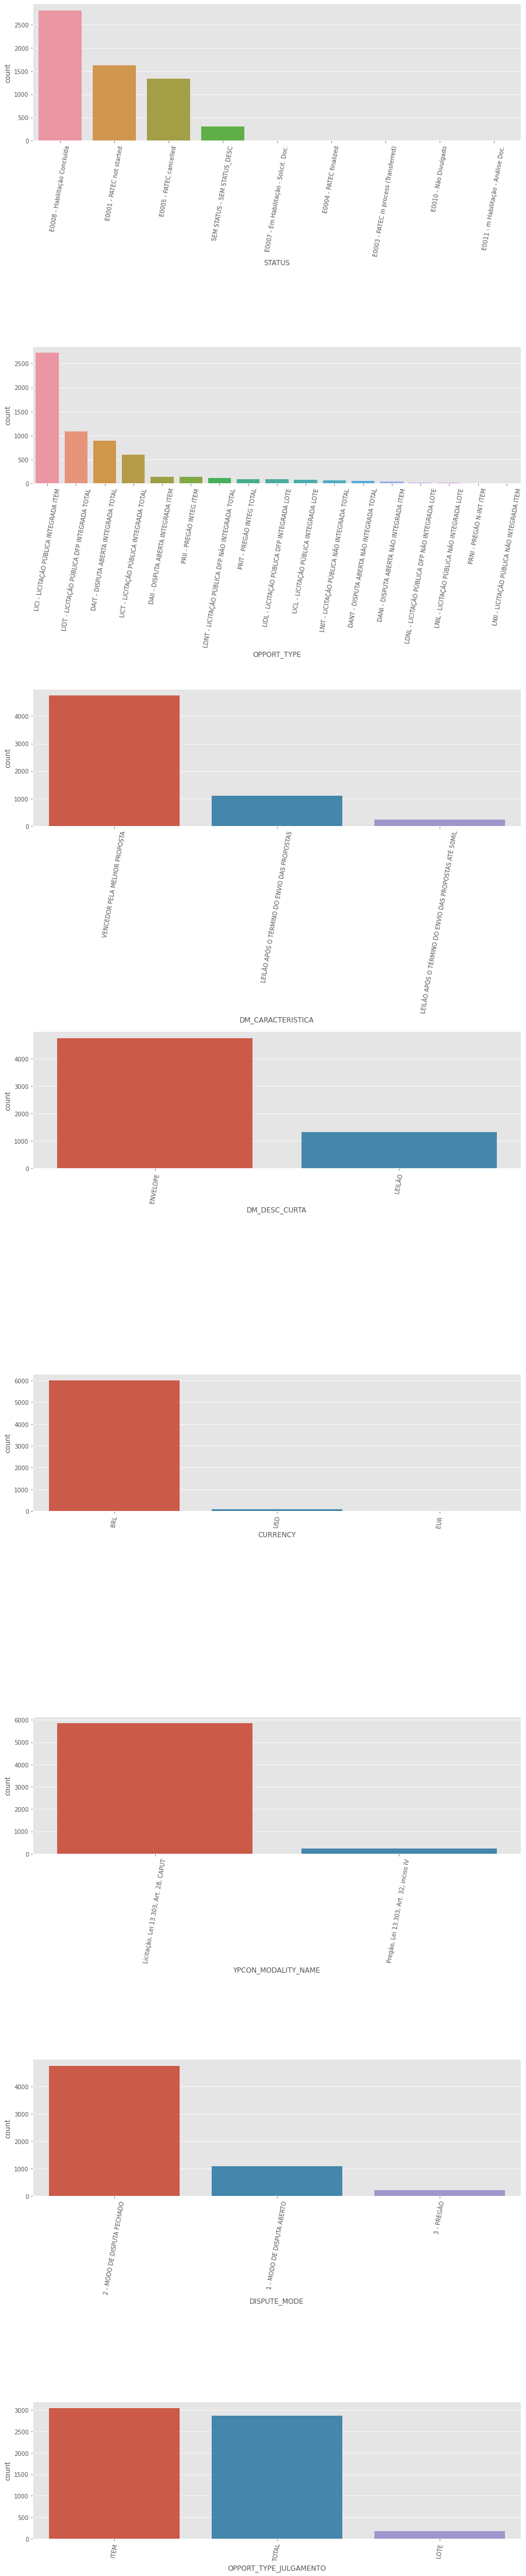

In [251]:
qtdplots = len(lista_objects)

if qtdplots==1:
  f, ax = plt.subplots(figsize=(45,25))
  sns.countplot(x=lista_objects[0], data=df, order=df[lista_objects[0]].value_counts().index)
else:

  print(qtdplots)
  f, ax = plt.subplots(qtdplots,1,figsize=(15,qtdplots*10))
  f.subplots_adjust(hspace=1.5, wspace=0.225)
  for idx,plts in enumerate(lista_objects):
    ax[idx]=sns.countplot(ax=ax[idx],x=plts, data=df, order=df[plts].value_counts().index)
    ax[idx].tick_params(axis='x', rotation=80)

#df.to_excel('BaseHeader_PowerBI.xlsx')

In [252]:
df.OPPORT_TYPE_JULGAMENTO.value_counts(normalize=True)

ITEM     0.499425
TOTAL    0.470994
LOTE     0.029581
Name: OPPORT_TYPE_JULGAMENTO, dtype: float64

<h2> plota alguns countplots para numéricos

<AxesSubplot:xlabel='YPCON_QUOTE_REQUEST', ylabel='count'>

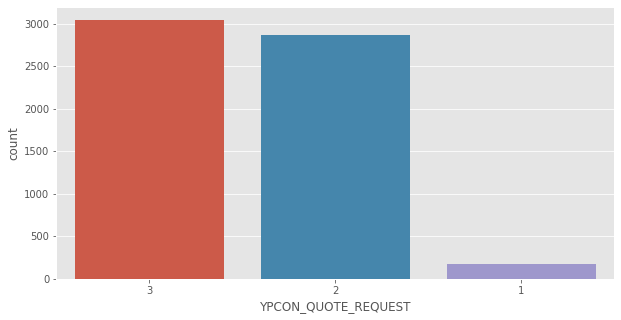

In [253]:
f, ax = plt.subplots(figsize=(10,5))
sns.countplot(x='YPCON_QUOTE_REQUEST', data=df, order=df['YPCON_QUOTE_REQUEST'].value_counts().index)

<AxesSubplot:xlabel='YPCON_QUOTE_REQUEST', ylabel='%'>

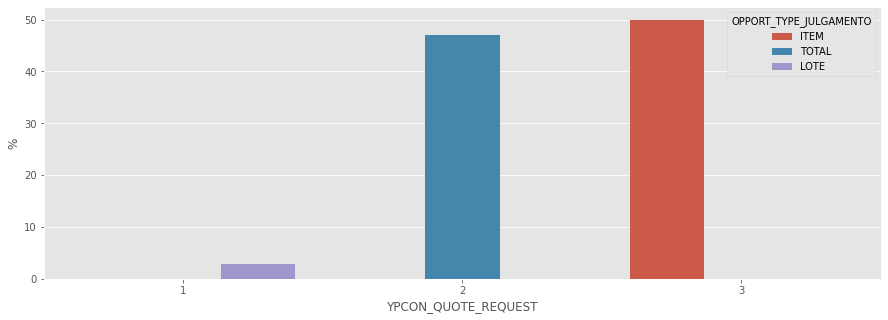

In [254]:
df_ypcon = df[['YPCON_QUOTE_REQUEST','OPPORT_TYPE_JULGAMENTO']].value_counts(normalize=True).rename('%').mul(100).reset_index().sort_values('%', ascending=False)

f, ax = plt.subplots(figsize=(15,5))
f.subplots_adjust(hspace=0.5, wspace=.2)
sns.barplot(data=df_ypcon, x='YPCON_QUOTE_REQUEST', y='%',hue='OPPORT_TYPE_JULGAMENTO')

In [255]:
df = df.drop('YPCON_QUOTE_REQUEST', axis=1)

In [256]:
df['END_DATE_H_MES'] = df['END_DATE_H'].dt.to_period('M')

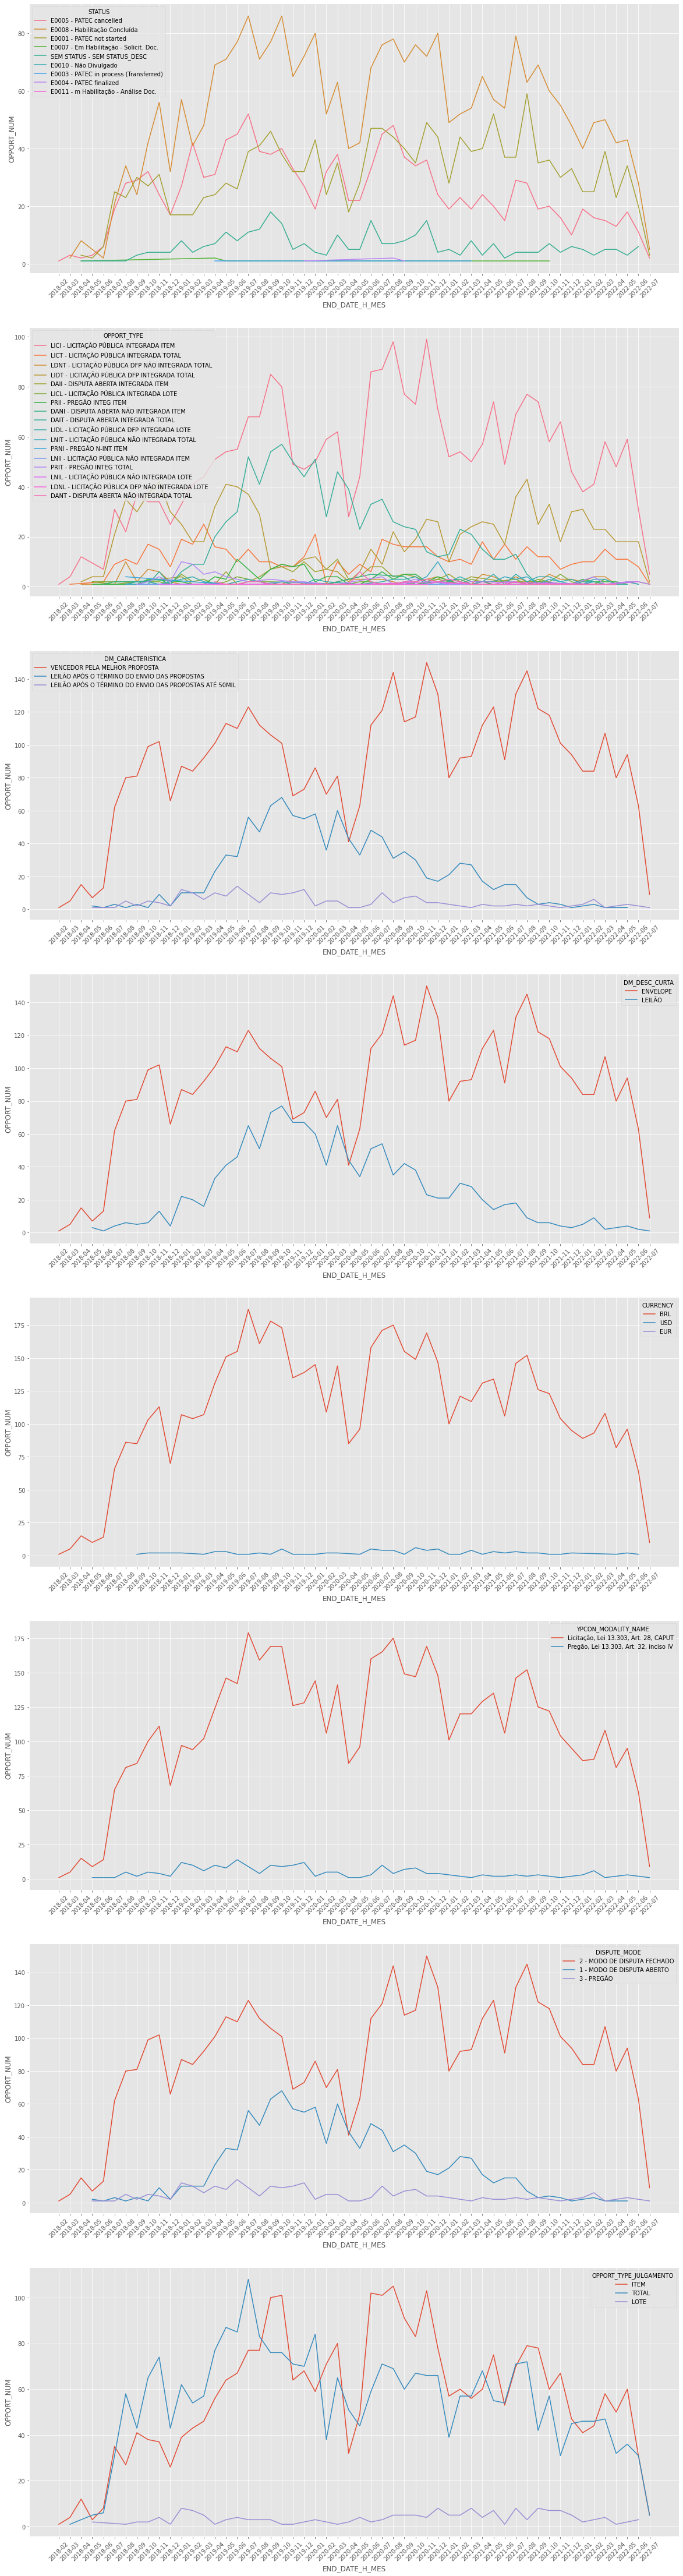

In [257]:
qtdplots = len(lista_objects)

if qtdplots==1:
  f, ax = plt.subplots(figsize=(45,25))
  sns.countplot(x=lista_objects[0], data=df, order=df[lista_objects[0]].value_counts().index)
else:
  f, ax = plt.subplots(qtdplots,1,figsize=(20,qtdplots*10)
  )
  #f.subplots_adjust(hspace=2, wspace=0.225)
  for idx,plts in enumerate(lista_objects):
    df_ano_mes = df.groupby(['END_DATE_H_MES',plts]).count()[['OPPORT_NUM']]
    df_ano_mes.reset_index(inplace=True)
    ax[idx]
    ax[idx]=sns.lineplot(ax=ax[idx],data=df_ano_mes,
                x=df_ano_mes['END_DATE_H_MES'].astype('str'), 
                y=df_ano_mes['OPPORT_NUM'], 
                ci=None, 
                hue=plts)
    ax[idx].tick_params(axis='x', rotation=45)

In [258]:
df['DURACAO']= (df['END_DATE_H'].dt.date - df['START_DATE_H'].dt.date).dt.days
df['DURACAO'].describe().to_frame()
df[['OPPORT_NUM','END_DATE_H','START_DATE_H','DURACAO']].sort_values('DURACAO',ascending=False)
df_duracao = df[df['START_DATE_H']!='1900-01-01 00:00:00']
std = df_duracao['DURACAO'].describe().T.to_frame().loc['std'][0]

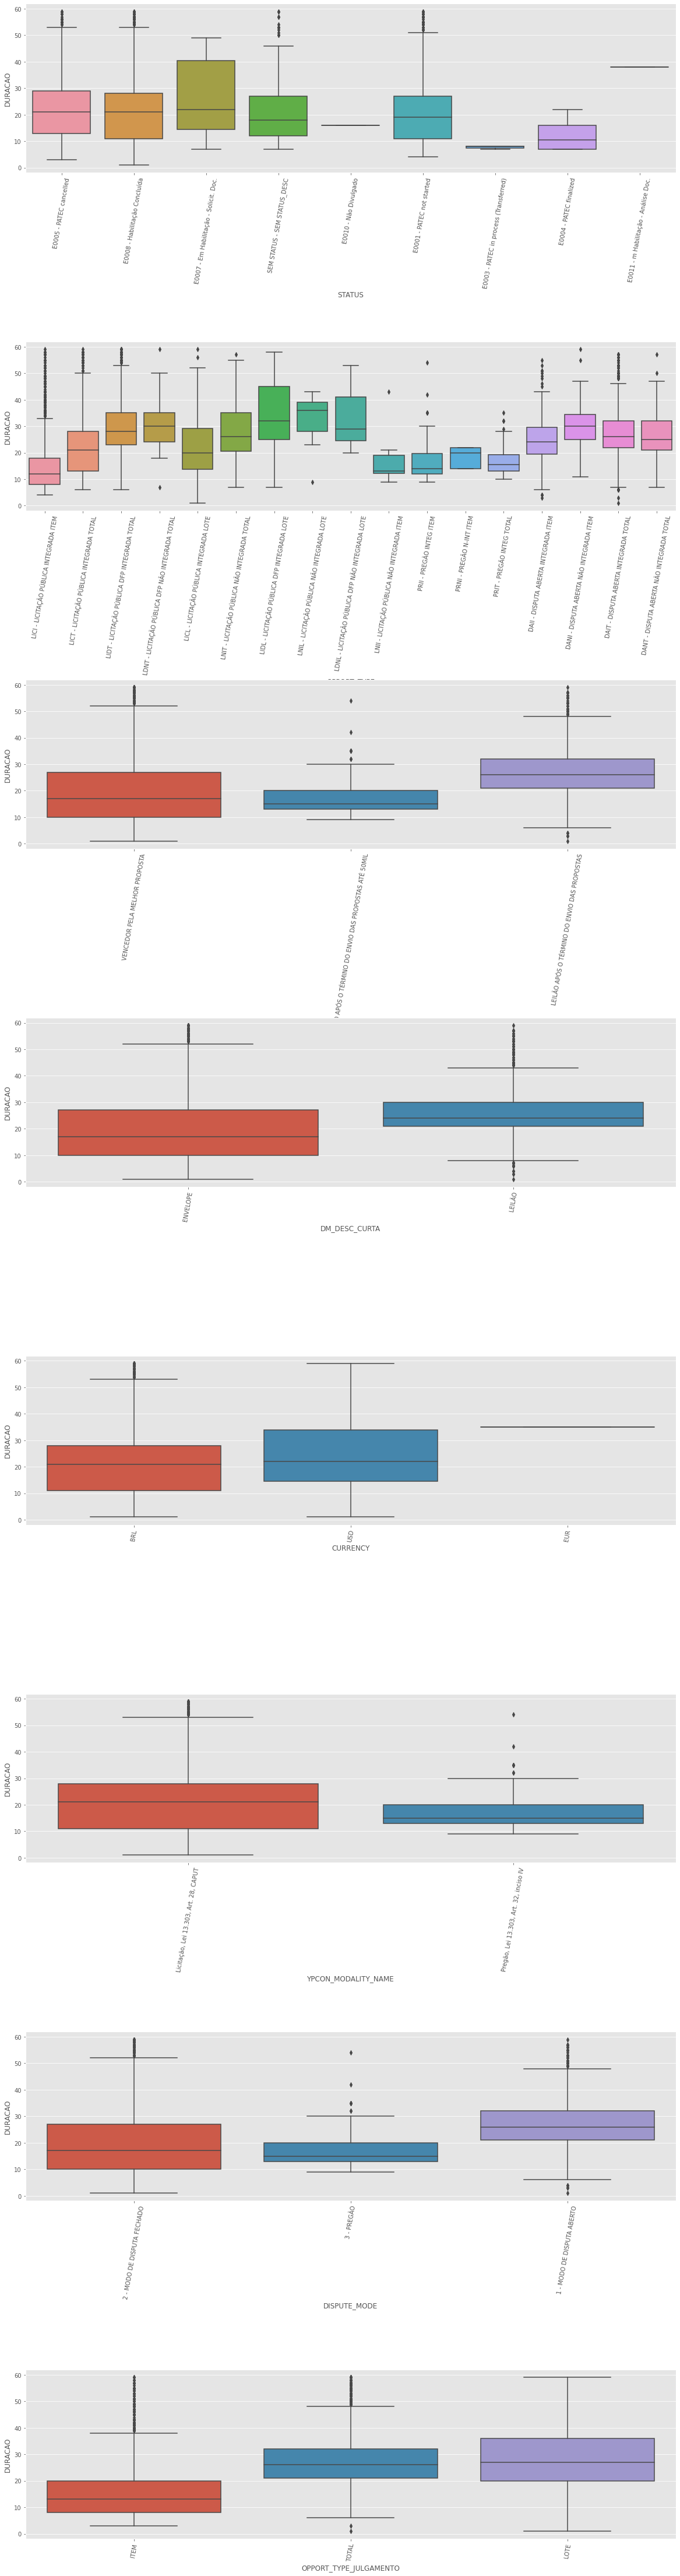

In [259]:
qtdplots = len(lista_objects)

if qtdplots==1:
  f, ax = plt.subplots(figsize=(45,25))
  sns.countplot(x=lista_objects[0], data=df, order=df[lista_objects[0]].value_counts().index)
else:
  f, ax = plt.subplots(qtdplots,1,figsize=(20,qtdplots*10))
  f.subplots_adjust(hspace=1, wspace=0.225)
  for idx,plts in enumerate(lista_objects):
    ax[idx]=sns.boxplot(ax=ax[idx],y='DURACAO',x=plts,data=df_duracao[df_duracao['DURACAO']<std*3])
    ax[idx].tick_params(axis='x', rotation=80)

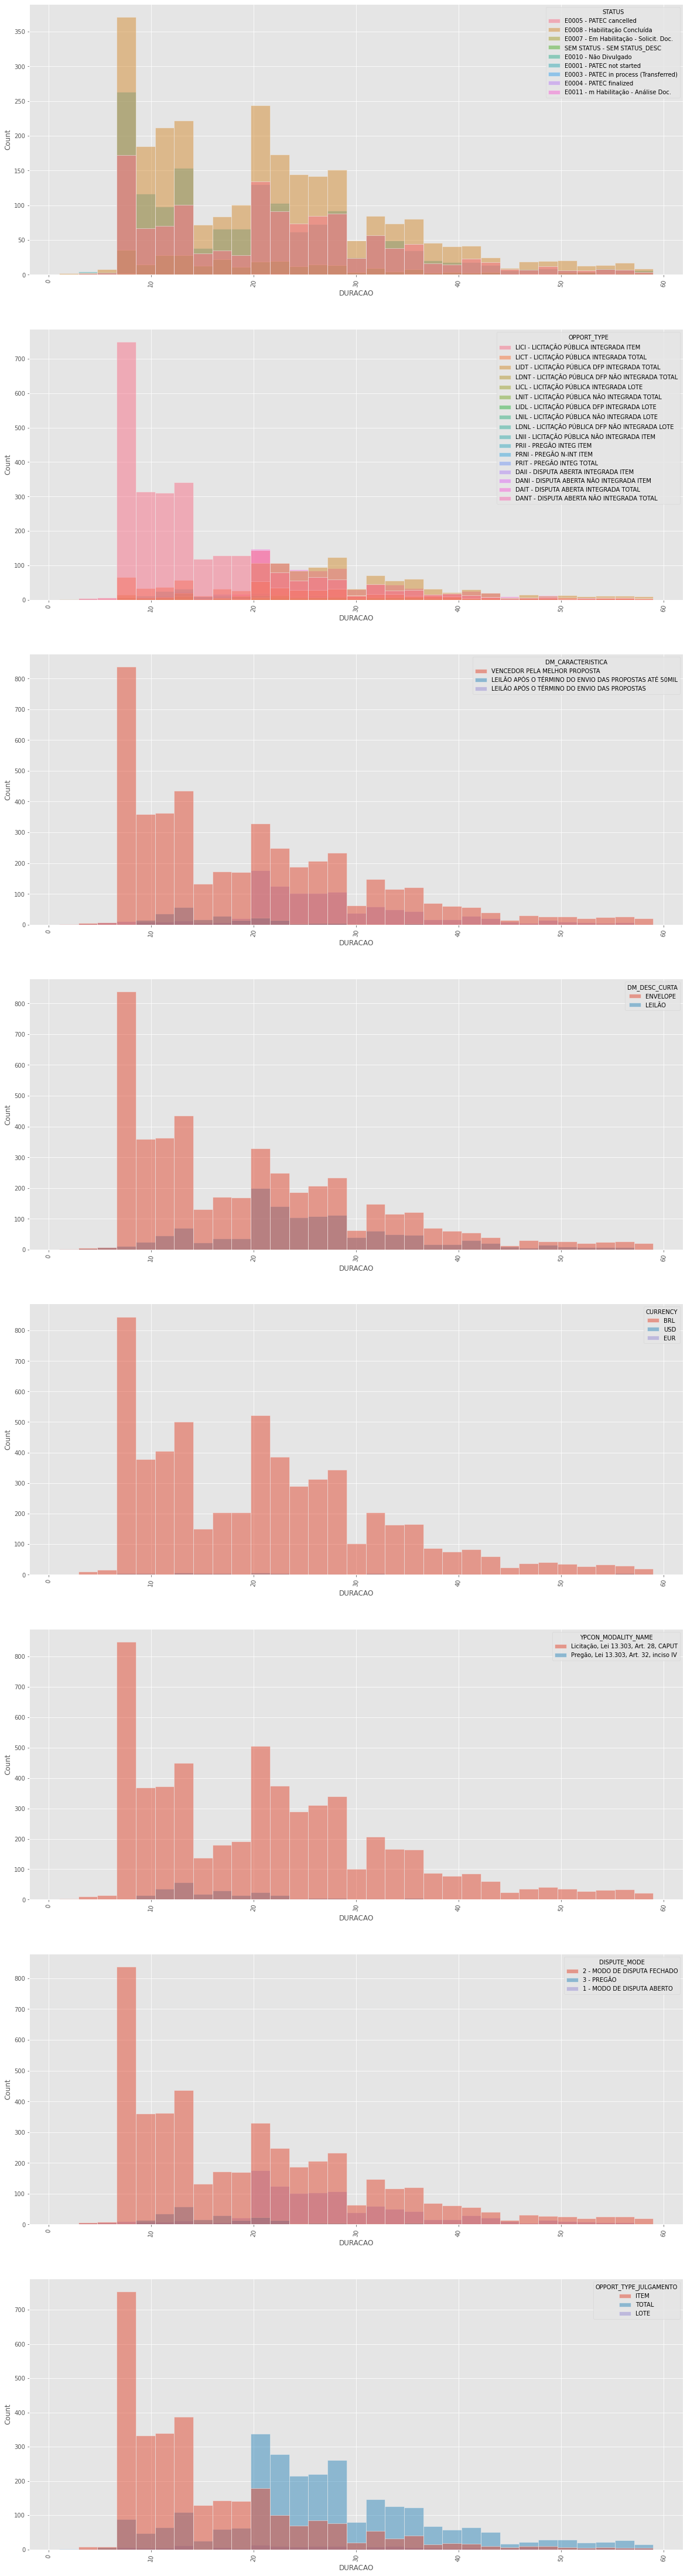

In [260]:
qtdplots = len(lista_objects)

if qtdplots==1:
  f, ax = plt.subplots(figsize=(45,25))
  sns.countplot(x=lista_objects[0], data=df, order=df[lista_objects[0]].value_counts().index)
else:
  f, ax = plt.subplots(qtdplots,1,figsize=(20,qtdplots*10))
  #f.subplots_adjust(hspace=2, wspace=0.225)
  for idx,plts in enumerate(lista_objects):
    ax[idx]=sns.histplot(ax=ax[idx],x='DURACAO',hue=plts, data=df_duracao[df_duracao['DURACAO']<std*3])
    ax[idx].tick_params(axis='x', rotation=80)

<h4> Baseando-se nas análises realizadas, o grupo decidiu que as oportunidades que deveriam ser analisadas para que seja possível realizar uma predição de vitória e/ou validade de proposta seriam nas oportunidades que tinham como características o critério de "VENCEDOR PELA MELHOR PROPOSTA" e o julgamento fosse realizado por "ITEM". Dessa forma seguiremos para uma base de 6085 oportunidades para 2729, ou seja, 45% dos dados encontrados para cabeçalhos

In [261]:
#df = df.query('SUB_STATUS != 4 & DM_CARACTERISTICA=="VENCEDOR PELA MELHOR PROPOSTA" & OPPORT_TYPE_JULGAMENTO=="ITEM"')

In [262]:
df.to_pickle('Header.pkl')
#df.to_excel('Header.xlsx')